In [16]:
# O. Wani (May, 2021)

import matplotlib.pyplot as plt # package for good plots
import pandas as pd             # package for data analytics
import numpy as np              # package for efficient numerics
import seaborn as sns           # for nice plots
import scipy.stats as stats     # fit a GEV distribution
import math                     # provides access to the mathematical functions 


In [38]:
#Let's generate samples from a gaussian copula, with a parameter corr

corr = 0.99 # tune it from 0 to 1. It is more sensitive between 0.9 and 1

mvnorm = stats.multivariate_normal([0, 0], [[1., corr], [corr, 1.]])
x = mvnorm.rvs((10000,)) # generate many samples so that we can do our binning trick to sample from the conditional copula
norm = stats.norm([0],[1])
x_unif = norm.cdf(x)

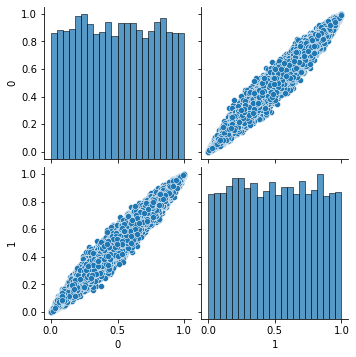

In [39]:
sns.pairplot(pd.DataFrame(x_unif))
# you can see that the marginals of this bivariate distribution have a support of (0,1) and are uniform. 
#This shows it is a copula.

In [40]:
# generate a time series from the copula

time_len = 5000 # length of the quantile time series
ts = [0.5] # initial value
a = x_unif[x_unif[:, 1].argsort()]

# this is where we bin the bivariate copula samples to generate conditional univariate samples

for i in range(time_len):
    f = math.floor(10*ts[i])/10
    c = f+0.1
    ts.append(np.random.choice(a[(a[:,1] > f) & (a[:,1] < c),0])) 

In [41]:
#plt.figure(figsize=(15, 6), dpi=80)
#plt.plot(ts) # show the autocorrelated quantile time series
# Using ts as quantiles, you can get the autocorrelated time series from the marginal distribution of discharge

Text(0.5, 0, 'time (--)')

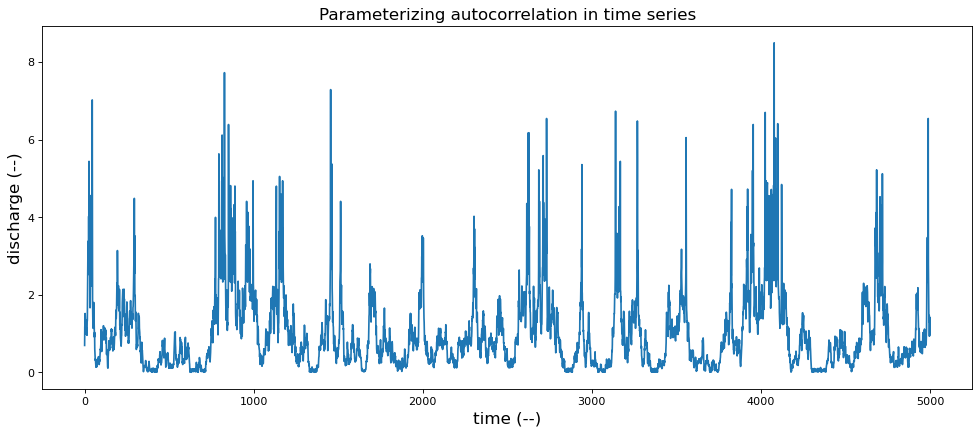

In [42]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(stats.gamma.ppf(ts, a=1, loc=0, scale=1))
plt.title('Parameterizing autocorrelation in time series', fontsize = 15)
plt.ylabel('discharge (--)', fontsize = 15)
plt.xlabel('time (--)', fontsize = 15)